In [1]:
install.packages("data.table")
require(data.table)
require(ggplot2)
require(repr)
require(rpart)
require(rattle)
require(Rcpp)
require(TSrepr)
require(zoo)
require(scatterplot3d)


  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.0 1.14.2              TRUE

  Binaries will be installed
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mirac\AppData\Local\Temp\RtmpUbxxXk\downloaded_packages


Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: repr
Loading required package: rpart
Loading required package: rattle
Warning message:
"package 'rattle' was built under R version 3.6.3"Loading required package: tibble
Loading required package: bitops
Warning message:
"package 'bitops' was built under R version 3.6.3"Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 4.0.5"Loading required package: TSrepr
Warning message:
"package 'TSrepr' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'


In [2]:
data_X=read.table("c:/users/mirac/uWaveGestureLibrary_X_TRAIN")
data_Y=read.table("c:/users/mirac/uWaveGestureLibrary_Y_TRAIN")
data_Z=read.table("c:/users/mirac/uWaveGestureLibrary_Z_TRAIN")
data_X=as.data.table(data_X)
data_Y=as.data.table(data_Y)
data_Z=as.data.table(data_Z)

In [3]:
data_X[,id:=1:.N]
setnames(data_X,'V1','class')
data_X[,class:=as.character(class)]
long_data_X=melt(data_X,id.vars=c('id','class'))
long_data_X[,time:=as.numeric(gsub("\\D", "", variable))-1]
long_data_X=long_data_X[,list(id,class,time,value)]
long_data_X=long_data_X[order(id,time)]
data_Y[,id:=1:.N]
setnames(data_Y,'V1','class')
data_Y[,class:=as.character(class)]
long_data_Y=melt(data_Y,id.vars=c('id','class'))
long_data_Y[,time:=as.numeric(gsub("\\D", "", variable))-1]
long_data_Y=long_data_Y[,list(id,class,time,value)]
long_data_Y=long_data_Y[order(id,time)]
data_Z[,id:=1:.N]
setnames(data_Z,'V1','class')
data_Z[,class:=as.character(class)]
long_data_Z=melt(data_Z,id.vars=c('id','class'))
long_data_Z[,time:=as.numeric(gsub("\\D", "", variable))-1]
long_data_Z=long_data_Z[,list(id,class,time,value)]
long_data_Z=long_data_Z[order(id,time)]
setnames(long_data_X,'value','valueX')
setnames(long_data_Y,'value','valueY')
setnames(long_data_Z,'value','valueZ')
long_data_all=cbind(long_data_X,long_data_Y$value,long_data_Z$value)
setnames(long_data_all,'V2','valueY')
setnames(long_data_all,'V3','valueZ')

In [4]:
long_data_all=long_data_all[,X:=cumsum(valueX),by=id]
long_data_all=long_data_all[,X:=cumsum(X),by=id]
long_data_all=long_data_all[,Y:=cumsum(valueY),by=id]
long_data_all=long_data_all[,Y:=cumsum(Y),by=id]
long_data_all=long_data_all[,Z:=cumsum(valueZ),by=id]
long_data_all=long_data_all[,Z:=cumsum(Z),by=id]
long_data_all=long_data_all[,total:=sqrt(X^2+Y^2+Z^2)]
long_data_all=long_data_all[,X:=cumsum(valueX),by=id]
long_data_all=long_data_all[,X:=cumsum(X),by=id]
long_data_all=long_data_all[,Y:=cumsum(valueY),by=id]
long_data_all=long_data_all[,Y:=cumsum(Y),by=id]
long_data_all=long_data_all[,Z:=cumsum(valueZ),by=id]
long_data_all=long_data_all[,Z:=cumsum(Z),by=id]
long_data_all=long_data_all[,total:=sqrt(X^2+Y^2+Z^2)]


In [5]:
class1_data=long_data_all[long_data_all[,class==1]]
class2_data=long_data_all[long_data_all[,class==2]]
class3_data=long_data_all[long_data_all[,class==3]]
class4_data=long_data_all[long_data_all[,class==4]]
class5_data=long_data_all[long_data_all[,class==5]]
class6_data=long_data_all[long_data_all[,class==6]]
class7_data=long_data_all[long_data_all[,class==7]]
class8_data=long_data_all[long_data_all[,class==8]]
class1ex=class1_data[class1_data[,id==577]]
class2ex=class2_data[class2_data[,id==333]]
class3ex=class3_data[class3_data[,id==833]]
class4ex=class4_data[class4_data[,id==166]]
class5ex=class5_data[class5_data[,id==50]]
class6ex=class6_data[class6_data[,id==760]]
class7ex=class7_data[class7_data[,id==47]]
class8ex=class8_data[class8_data[,id==25]]

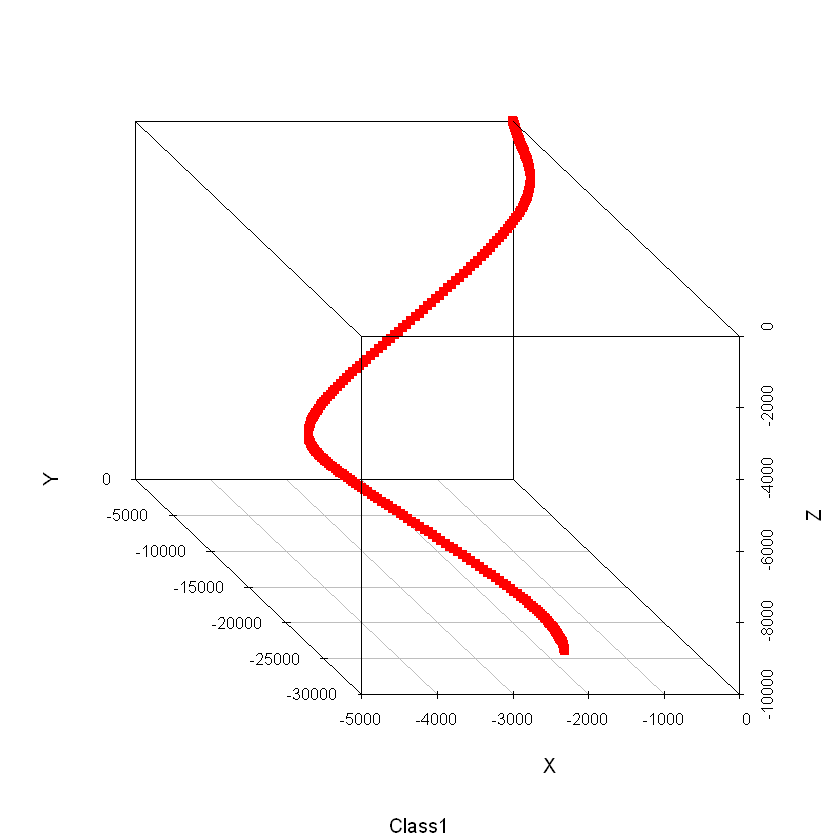

In [6]:
scatterplot3d(class1ex$X,class1ex$Y,class1ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=135,sub="Class1")

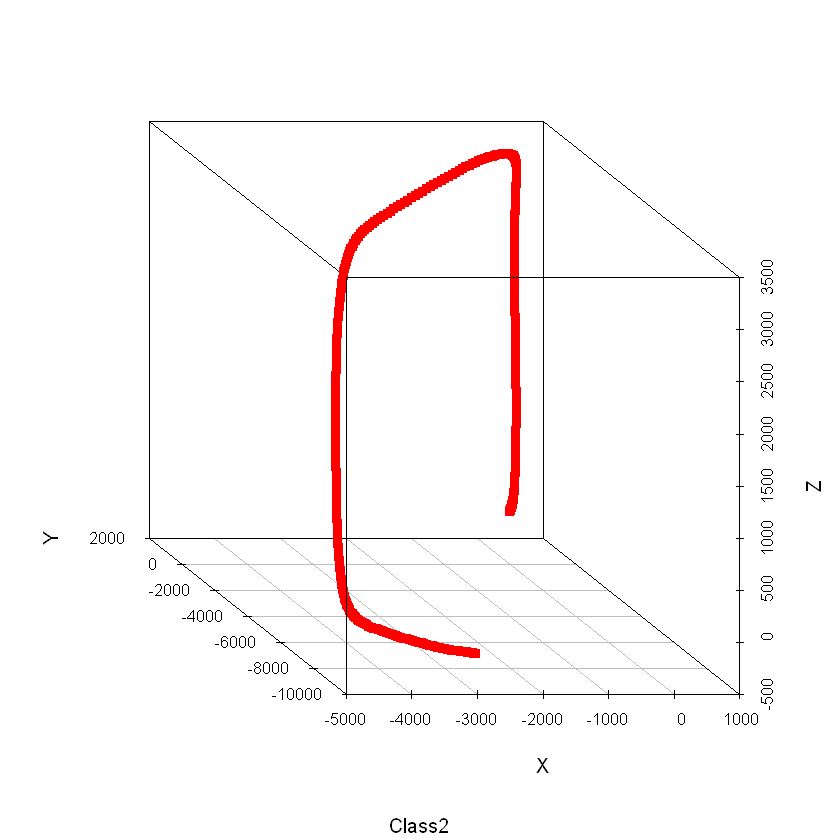

In [7]:
scatterplot3d(class2ex$X,class2ex$Y,class2ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=135,sub="Class2")

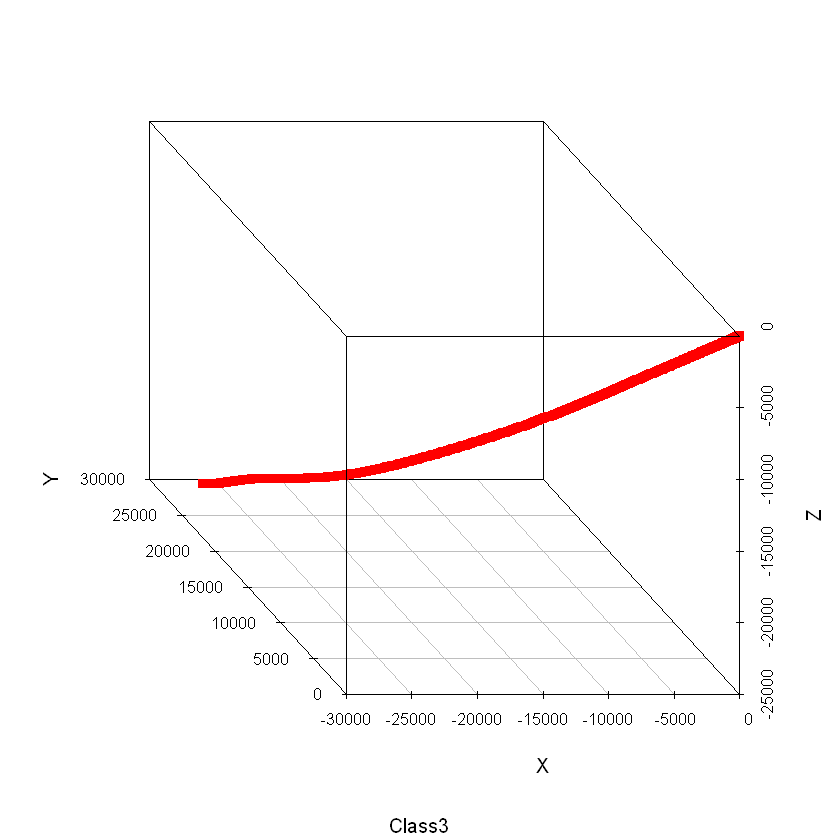

In [8]:
scatterplot3d(class3ex$X,class3ex$Y,class3ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=135,sub="Class3")

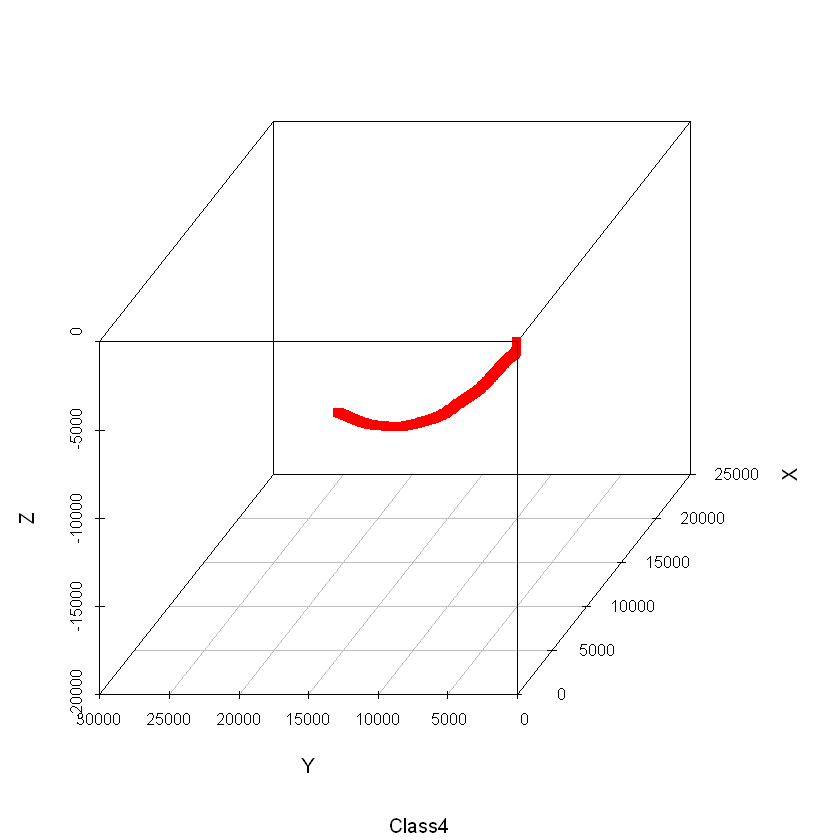

In [9]:
scatterplot3d(class4ex$X,class4ex$Y,class4ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=225,sub="Class4")

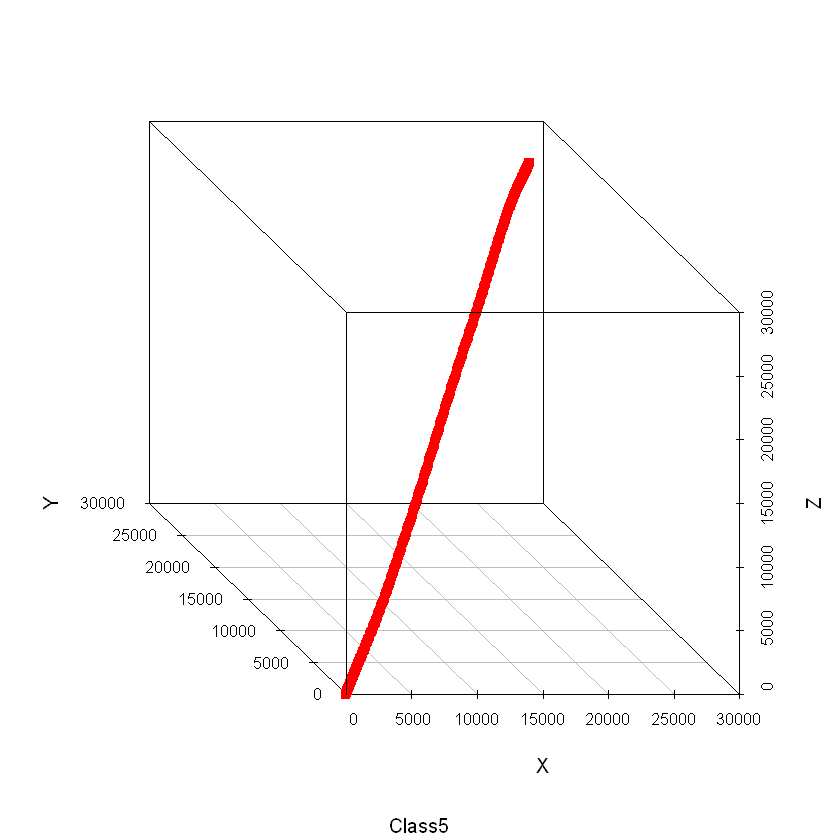

In [10]:
scatterplot3d(class5ex$X,class5ex$Y,class5ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=135,sub="Class5")

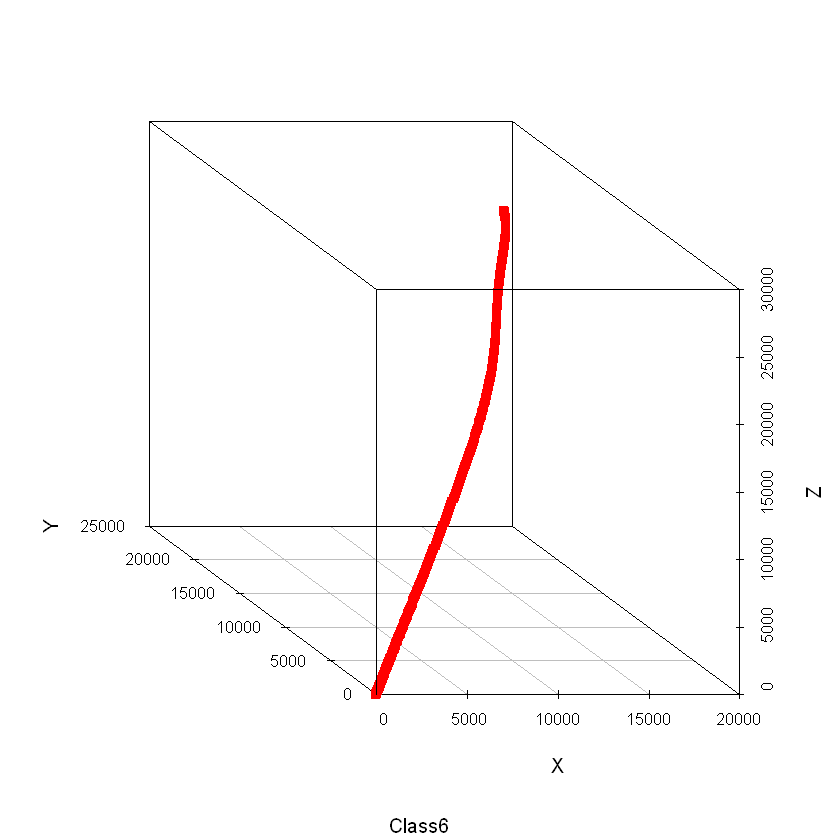

In [11]:
scatterplot3d(class6ex$X,class6ex$Y,class6ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=135,sub="Class6")

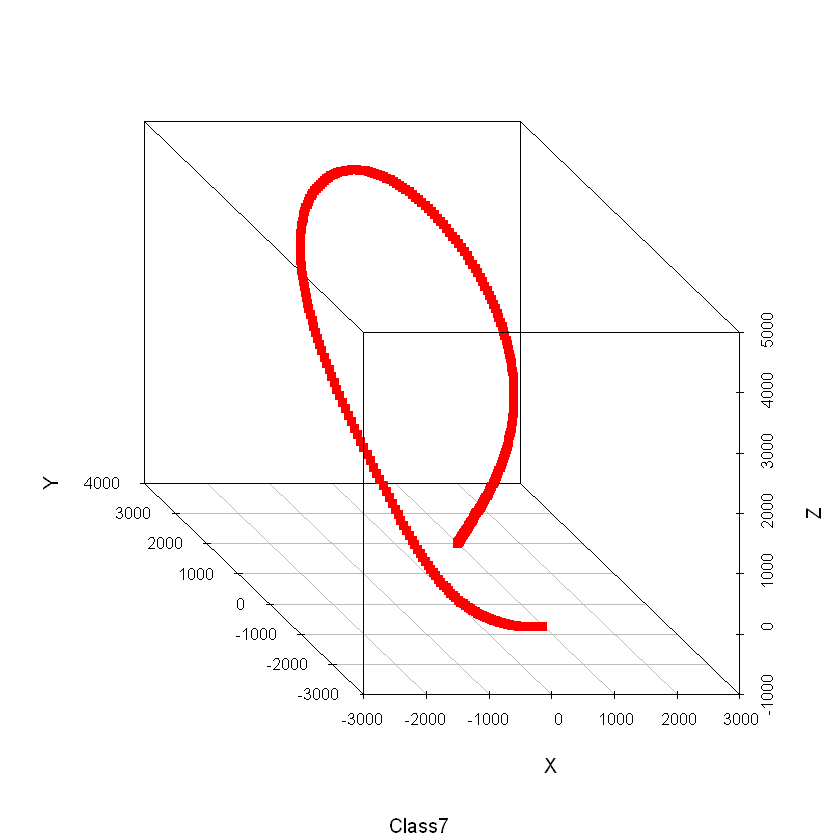

In [12]:
scatterplot3d(class7ex$X,class7ex$Y,class7ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=135,sub="Class7")

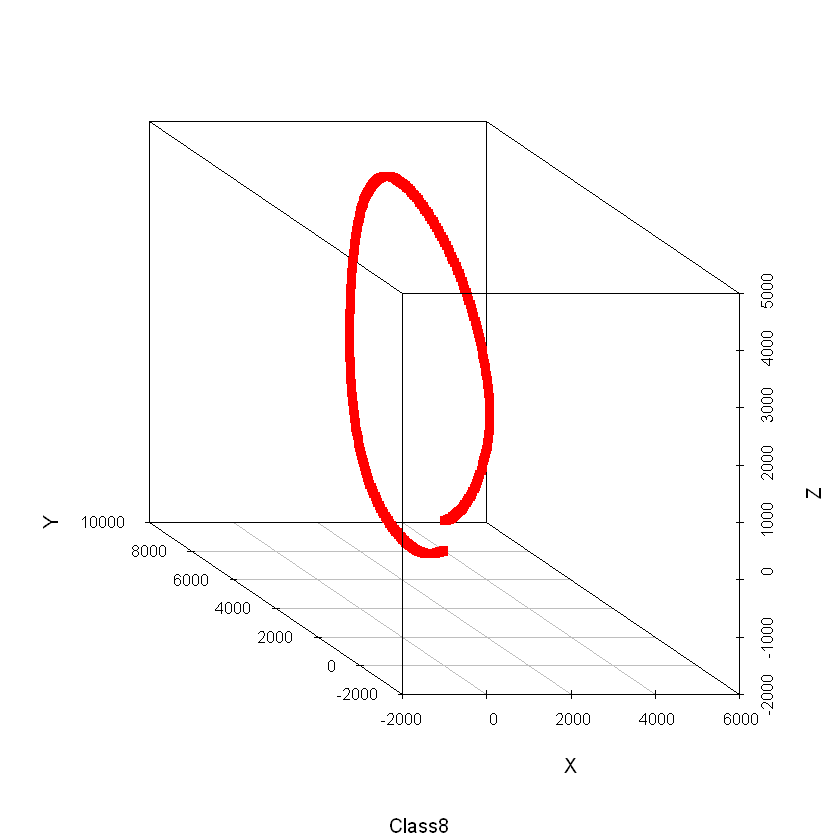

In [13]:
scatterplot3d(class8ex$X,class8ex$Y,class8ex$Z,color="red",pch=15,xlab="X",ylab="Y",zlab="Z",angle=135,sub="Class8")

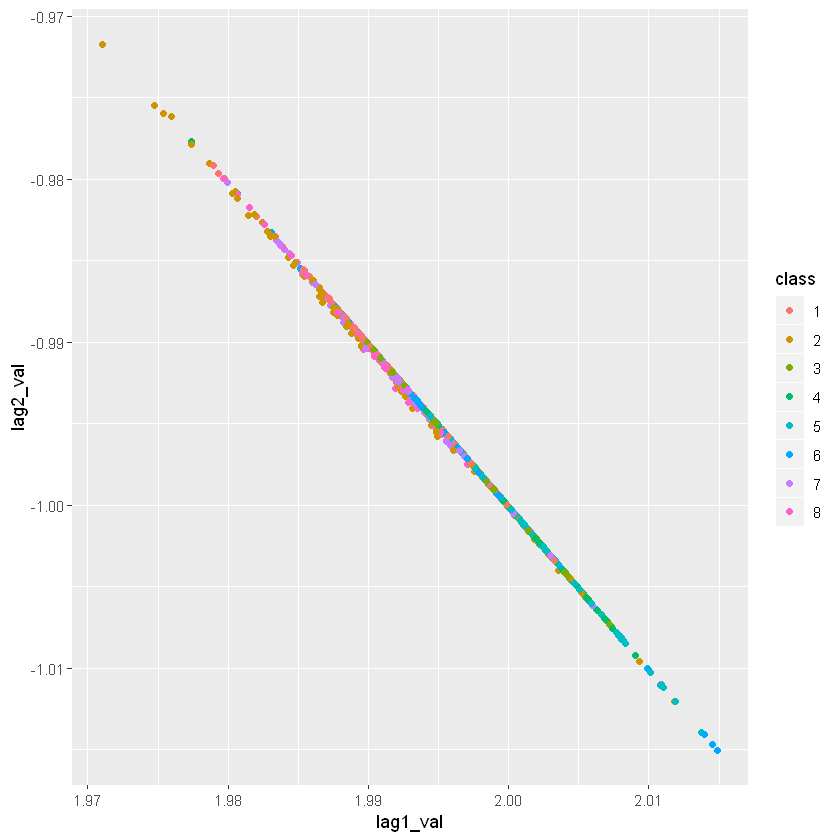

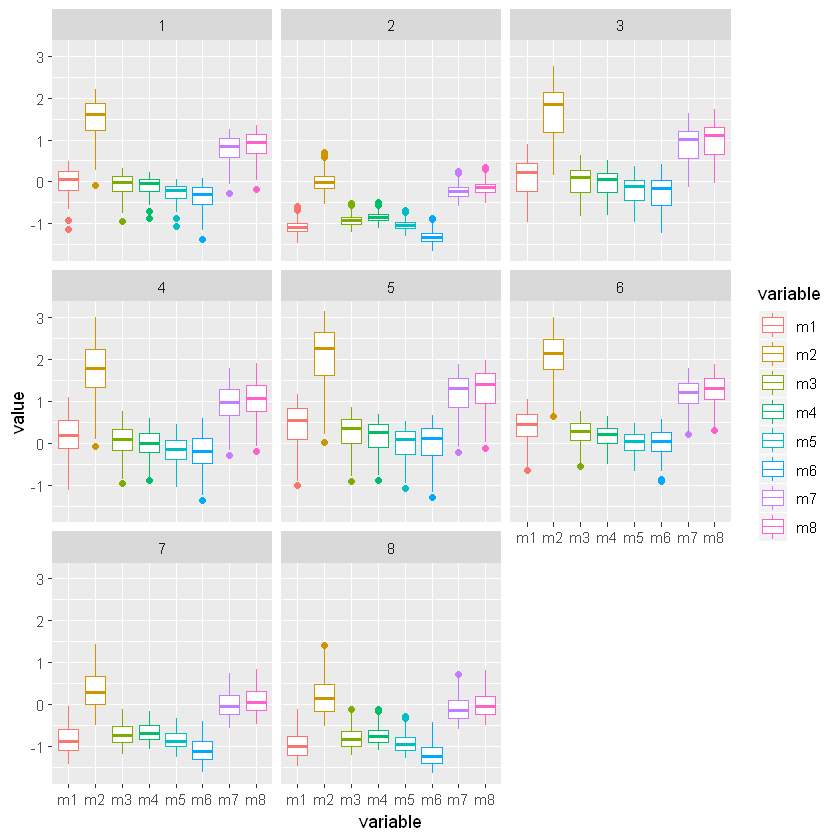

In [14]:
ar_long_data=copy(long_data_all)
ar_long_data=ar_long_data[order(id,time)]
ar_long_data[,lag1_val:=shift(total,1),by=list(id)]
ar_long_data[,lag2_val:=shift(total,2),by=list(id)]
series_id=unique(ar_long_data$id)
fit_ar2=function(dat){
fit=lm(total~lag1_val+lag2_val,dat)
return(data.frame(t(coef(fit))))
}
fitted_coef=lapply(series_id,function(x) fit_ar2(ar_long_data[id==x]))
coef_dt=rbindlist(fitted_coef)
coef_dt[,id:=series_id]
coef_dt=merge(coef_dt,long_data_all[,list(id,class)],by='id')
ggplot(coef_dt,aes(x=lag1_val,y=lag2_val,color=class)) + geom_point()
class_id=unique(ar_long_data$class)
fit_ar2=function(dat){
fit=lm(total~lag1_val+lag2_val,dat)
return(fit)
}
fitted_models=lapply(class_id,function(x) fit_ar2(ar_long_data[class==x]))
ar_data_with_predictions=copy(ar_long_data)
for(i in 1:length(class_id)){
current_class=class_id[i]
ar_data_with_predictions[,paste0('residual_',current_class):=total-predict(fitted_models[[i]],ar_data_with_predictions)]
}
residual_stats=ar_data_with_predictions[,list(m1=mean(residual_1,na.rm=T),
m2=mean(residual_2,na.rm=T),
m3=mean(residual_3,na.rm=T),
m4=mean(residual_4,na.rm=T),
m5=mean(residual_5,na.rm=T),
m6=mean(residual_6,na.rm=T),
m7=mean(residual_7,na.rm=T),
m8=mean(residual_8,na.rm=T)),
by=list(id,class)]
residual_stats=melt(residual_stats,id.vars=c('id','class'))
ggplot(residual_stats, aes(x=variable, y=value, color=variable)) +
geom_boxplot() + facet_wrap(~class)


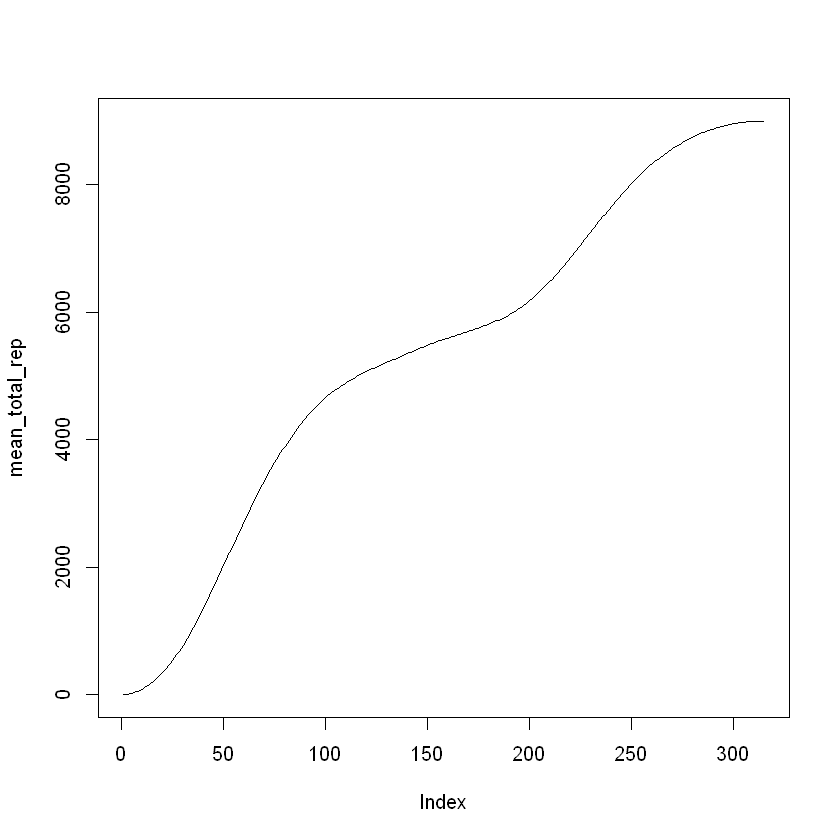

Warning message:
"Removed 540 rows containing missing values (geom_path)."

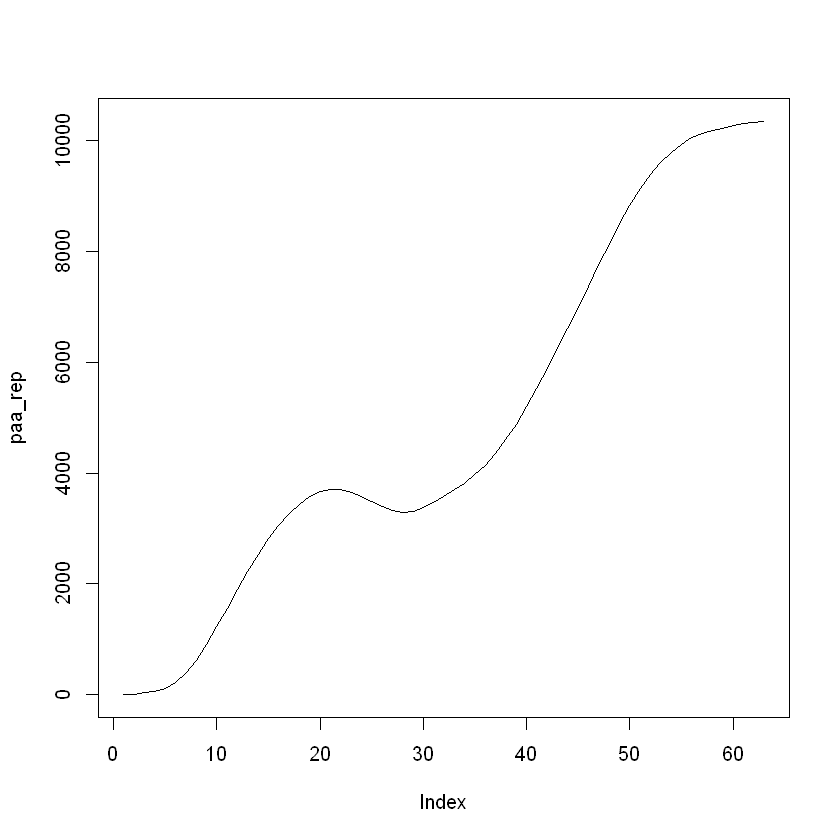

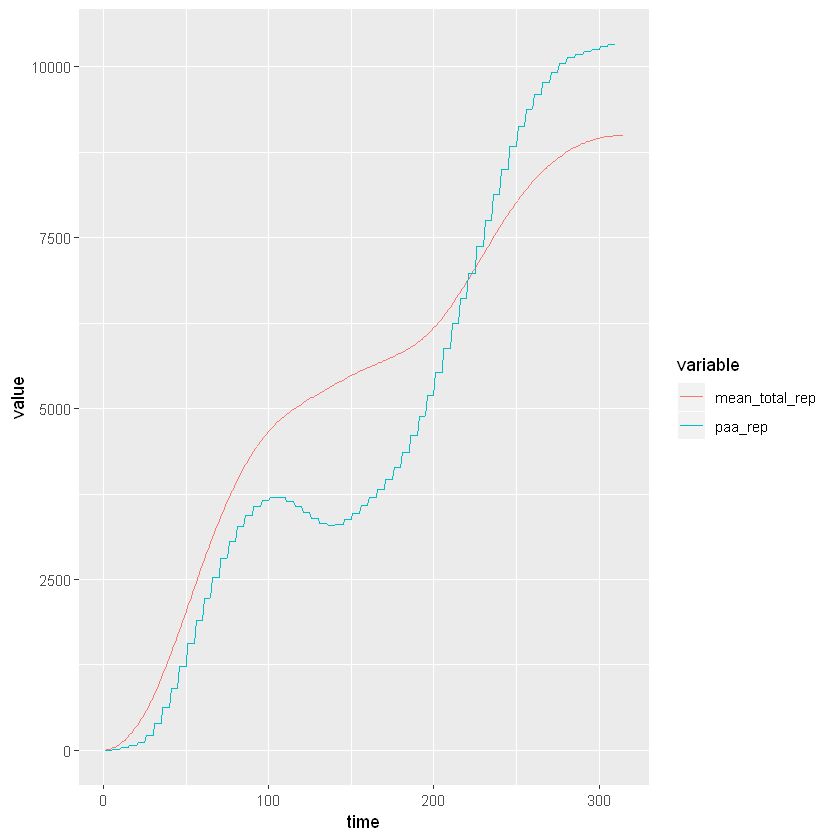

In [15]:
selected_class=2
data_plot=long_data_all[order(time,id)]
data_plot=data_plot[data_plot[,class==selected_class]]
segment_length=nrow(data_plot)/315
data_plot_ts=data_plot[class==selected_class]$total
mean_total_rep=repr_paa(data_plot_ts, segment_length, meanC)
plot(mean_total_rep,type='l')
dummy_time=c(1:(length(mean_total_rep)-1))*segment_length 
dummy_time=c(dummy_time,nrow(data_plot))   
dt_mean_total=data.table(time=dummy_time,mean_total_rep=mean_total_rep)
dt_mean_total=dt_mean_total[,id:=1:.N]
dt_mean_total$time=NULL
setnames(dt_mean_total,'id','time')
data_plot=merge(data_plot,dt_mean_total,by='time',all.x=T)

selected_series=333
segment_length_paa=5
long_data_all=long_data_all[order(id,time)] 
data_ts=long_data_all[id==selected_series]$total
paa_rep=repr_paa(data_ts, segment_length_paa, meanC)
plot(paa_rep,type='l')


dummy_time=c(1:(length(paa_rep)-1))*segment_length_paa 
dummy_time=c(dummy_time,nrow(data_plot))   
dt_paa=data.table(time=dummy_time,paa_rep=paa_rep)
data_plot=merge(data_plot,dt_paa,by='time',all.x=T)
data_plot[,paa_rep:=nafill(paa_rep,'nocb')]
data_plot=melt(data_plot,id.vars='time',
               measure.vars=c('mean_total_rep','paa_rep'))

ggplot(data_plot,aes(x=time,y=value,color=variable))+
    geom_line()